In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

In [61]:
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows"  , 200)
pd.set_option("display.max_rows" , 50)


In [62]:
df= pd.read_csv('online_retail.csv')


In [63]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [65]:
df.shape

(1067371, 8)

In [66]:
df.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


The columns which are to be used for the analysis for both univariate and Multivariate Analysis : 
<br>
1. Invoice
2. Quantity
3. Price
4. Customer ID
5. Country


In [67]:
# Check for the missing values and the duplicate values as well  : 
df.isnull().sum()

Invoice             0
StockCode           0
Description      4382
Quantity            0
InvoiceDate         0
Price               0
Customer ID    243007
Country             0
dtype: int64

In [68]:
# Check the values in the percentage : 
( df.isnull().sum() / len(df) ) * 100


Invoice         0.000000
StockCode       0.000000
Description     0.410541
Quantity        0.000000
InvoiceDate     0.000000
Price           0.000000
Customer ID    22.766873
Country         0.000000
dtype: float64

Customer ID is Empty as 22% and Description is Empty as less than 1% so for description we would drop all the values. 
<br>
IF we wanna make machine learning model : we can drop the values
IF we wanna do only eda we can impude the values for customer ID as missing or nor_marked 
In this one as the dataset is large we can drop the values

we can make the df = df.dropna(subset['customer ID']).copy()

or we can use the df = df.dropna().copy()

In [69]:
df = df.dropna().copy()
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [70]:
df.shape

(824364, 8)

In [71]:
df.describe()

,Quantity,Price,Customer ID
count,824364.000000,824364.000000,824364.000000
mean,12.414574,3.676800,15324.638504
std,188.976099,70.241388,1697.464450
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13975.000000
50%,5.000000,1.950000,15255.000000
75%,12.000000,3.750000,16797.000000
max,80995.000000,38970.000000,18287.000000


In [72]:
df.isnull().sum() / len(df) * 100

Invoice        0.0
StockCode      0.0
Description    0.0
Quantity       0.0
InvoiceDate    0.0
Price          0.0
Customer ID    0.0
Country        0.0
dtype: float64

Now there are no null values in the dataset now we can start with the Univariate and Multivariate Analysis Now.

# Univariate Analysis

1. Mean Median Mode and STD of analysis
2. Check for the individual Columns for the Box plot ( check outliers ) check for the values ,  histogram  , Violinplot  , check for other graphs as well. 
3. Check for the IQR if there are outliers then remove it 
4. Check for the skewness and Kurtosis analysis 
5. Optional - QQPlot and shapio Test - just to reconfirm that the data is distributed normally. 
6. Check if possible to maek pivot table and a rolling window funciton if the data is continous.

Column to consider for the univariate analysis  : 
Price
For rest of the columns are not good enough for the analysis :

# Multivariate Analysis: 

1. Chekc the relation between the variables using the scatter plot line chart and bar chart etx.
2. Make the correlation matrix and heatmap using the same
3. PCA and  TSNE test to check weather the data is good enough for regression and clustering

In [73]:
# Mean Median Mode STD for the price columns : 

print(f"Mean for Price Column {df.Price.mean()} Pounds")
print(f"Median for Price Column {df.Price.median()} Pounds")
print(f"Mode for the Price Column {df.Price.mode()} Pounds")
print(f"STD for the Price Column {df.Price.std()} Pounds")


Mean for Price Column 3.6767995788268304 Pounds
Median for Price Column 1.95 Pounds
Mode for the Price Column 0    1.25
Name: Price, dtype: float64 Pounds
STD for the Price Column 70.24138768949331 Pounds


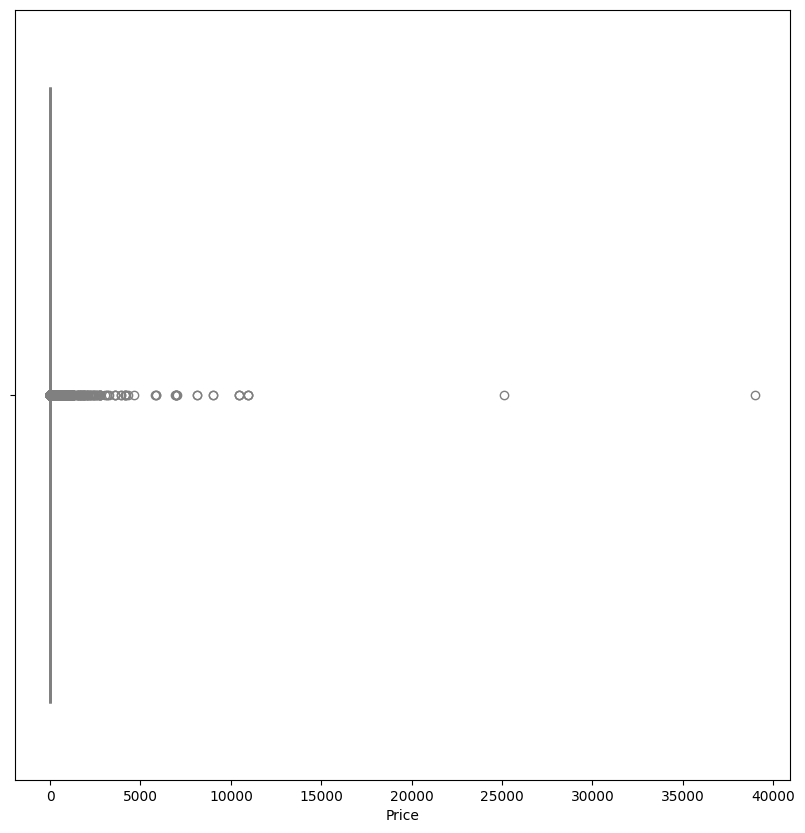

In [74]:
# Lets check for the boxplot for the price column  : 

plt.figure(figsize=(10 , 10))
sns.boxplot(data= df ,x = df.Price , color="green" , linecolor="grey" , linewidth=2  )
plt.show()

Check for the values and do the binning.

In [75]:
# In this one we would do the binning for the dataset so that we can visualize in : 
# But lets check the min and max values and take a look at the dataset again : 

print(df.Price.max())
print(df.Price.min())
print(df.Price.mean())



38970.0
0.0
3.6767995788268304


In [86]:
bins  = [0 , 5 , 10 , 20 , 50 , 100  , 200 , 201]
bin_labels  = ["0-5" , "6-10" , "11-20" , "21-50" , "51-100" , "101-200" , "200+"]

df['price_labels'] = pd.cut(df['Price'] , bins = bins , labels=bin_labels , include_lowest=True)

df.head()


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,price_labels
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,6-10
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,6-10
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,6-10
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,0-5
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0-5


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 824364 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype   
---  ------        --------------   -----   
 0   Invoice       824364 non-null  object  
 1   StockCode     824364 non-null  object  
 2   Description   824364 non-null  object  
 3   Quantity      824364 non-null  int64   
 4   InvoiceDate   824364 non-null  object  
 5   Price         824364 non-null  float64 
 6   Customer ID   824364 non-null  float64 
 7   Country       824364 non-null  object  
 8   price_labels  823969 non-null  category
dtypes: category(1), float64(2), int64(1), object(5)
memory usage: 57.4+ MB


In [93]:
# Before we do multivariate analysis lets do the IQR : 

# Get the numeric columns from the dataset : 

# numeric_cols = df.select_dtypes(include=['float64','int64']).columns

# or we can manually select the columns : 
numeric_cols = ['Quantity' , 'Price' ]

Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR  = Q3 - Q1
lower_bound  = Q1 - 1.5 * IQR
upper_bound   =  Q3 + 1.5 * IQR

df = df[~((df[numeric_cols] < lower_bound) | (df[numeric_cols] > upper_bound)).any(axis=1)]


In [94]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,price_labels
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,6-10
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,6-10
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,6-10
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,0-5
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom,0-5


In [96]:
from scipy.stats import skew , kurtosis

numeric_cols

# skew_values = df.apply(lambda x :skew(x))
# kurtosis_values  = df.apply(lambda x : kurtosis(x))

skew_values  = df[numeric_cols].skew()
kurtosis_values  = df[numeric_cols].kurtosis()
summary = pd.DataFrame({"skewness" : skew_values , "Kurtosis Analysis" : kurtosis_values})

print(summary)

          skewness  Kurtosis Analysis
Quantity  1.156549           0.828568
Price     1.129306           0.688913


Now we can see that the if x > 0.5 that the data is right skewed and both the values are more than  0.5 and means it is right skewed then if the values is less then -0.5 then the data is left skewed. 

Now for the kurtosis is more then x > 0 then sharp edge and if the x < 0 then flat edge but in practical cases we take it for 1 to 1 

Columns to choose for Multivariate Analysis are  : 

1. Country vs Price Labels
2. Country vs Customer Count

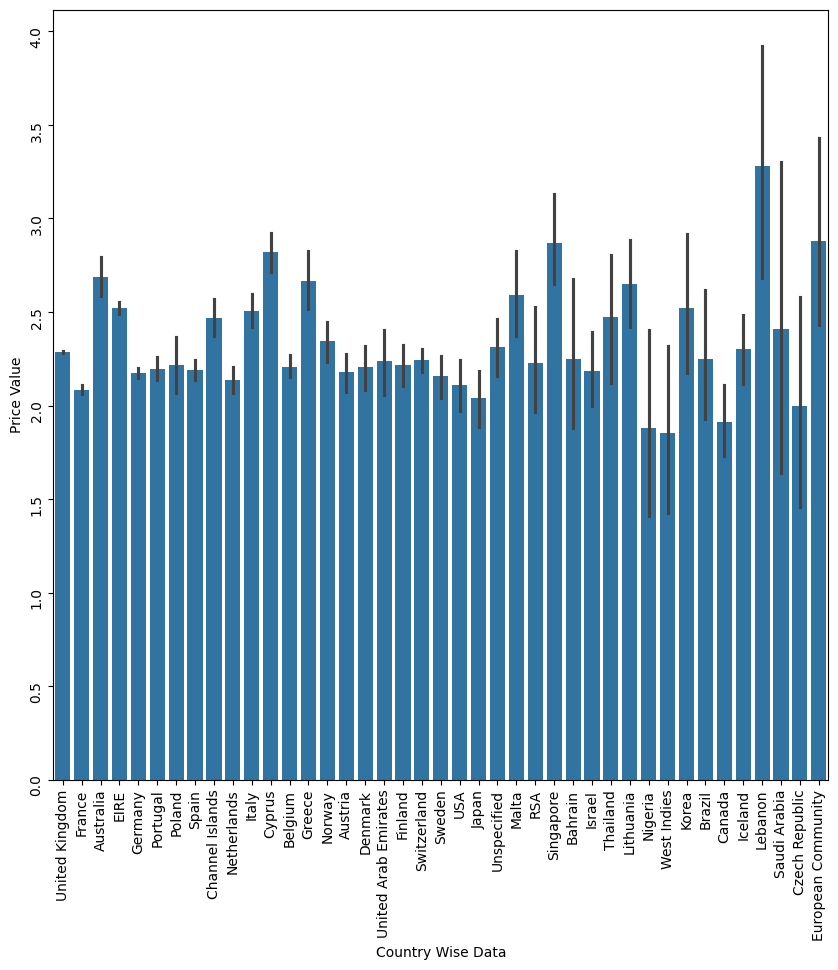

In [102]:
plt.figure(figsize=(10 , 10))
plt.xlabel("Country Wise Data")
plt.ylabel("Price Value")
plt.xticks(rotation  = 90)
plt.yticks(rotation = 90)
sns.barplot(data = df , x = df.Country , y =df.Price)
plt.show()

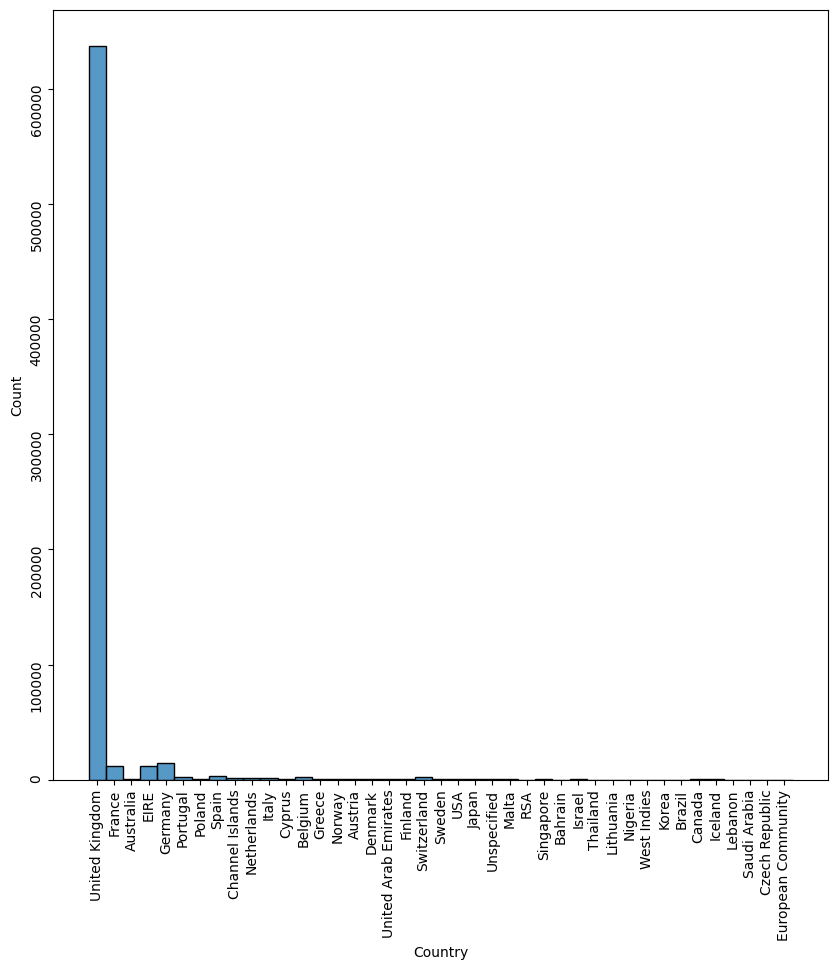

In [105]:
plt.figure(figsize=(10 , 10))
sns.histplot(data = df , x = df.Country)
plt.xticks(rotation = 90)
plt.yticks(rotation = 90)
plt.show()

Final check for the : Dataset to check if the values are :  good for the regression model or clustering.  

check for the correlation as well. before :

In [111]:
correlation = df[numeric_cols].corr()
print(correlation)

          Quantity     Price
Quantity  1.000000 -0.344138
Price    -0.344138  1.000000


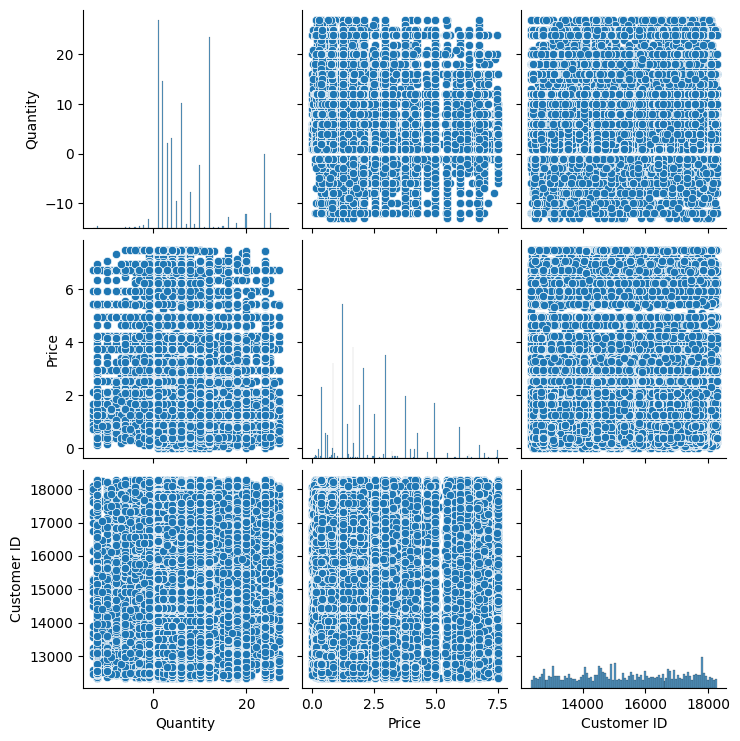

In [108]:
sns.pairplot(data=df)

<Axes: >

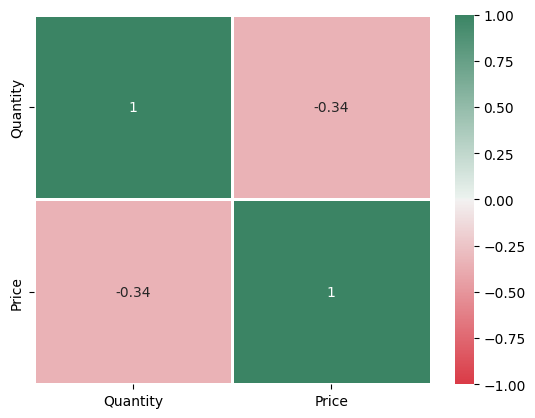

In [115]:
cmap = sns.diverging_palette(10 , 150 , as_cmap=True)
sns.heatmap(correlation , annot=True , vmin=-1  , vmax= 1  , center= 0 , linecolor="white" , linewidths=2  , cmap=cmap)

In [116]:
# Lets do a final check for the PCA and TSNE Test : 
import statsmodels.api as sm
from scipy.stats import shapiro

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE


In [125]:
scaler  =StandardScaler()

x_scaled  = scaler.fit_transform(df[numeric_cols])


# For the PCA :

pca  = PCA(n_components=None)
pca_values = pca.fit_transform(x_scaled)

print(pca_values)



[[1.53637048 2.55459836]
 [1.44865761 2.46688549]
 [1.44865761 2.46688549]
 ...
 [1.13956988 0.49543851]
 [1.13956988 0.49543851]
 [1.59431882 0.74239255]]


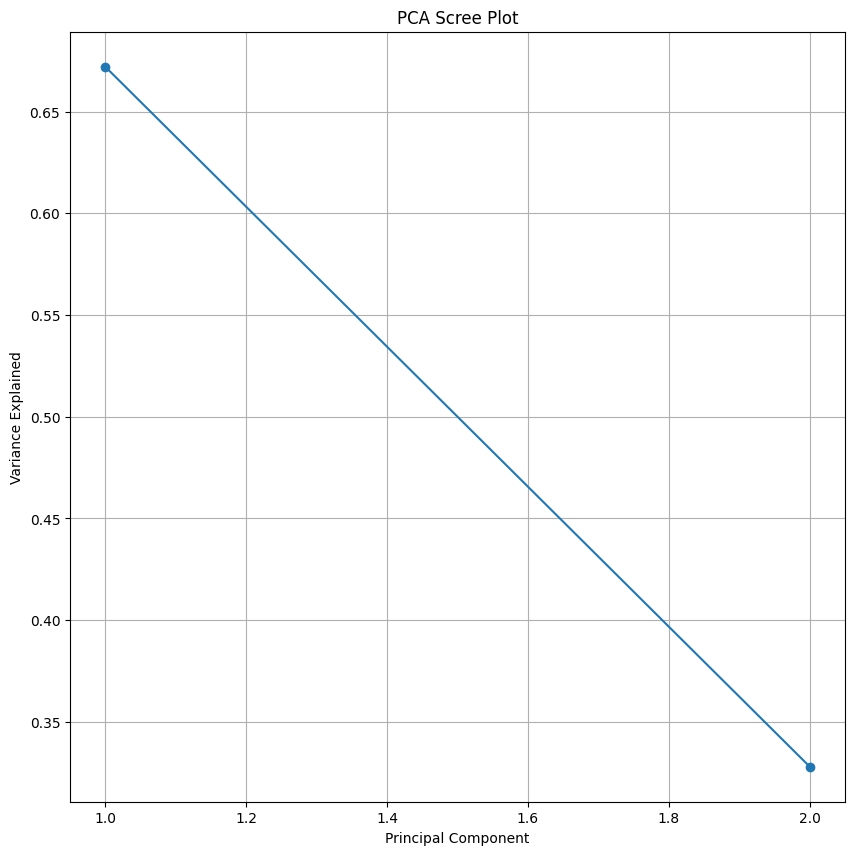

In [127]:
plt.figure(figsize=(10 , 10))
plt.plot(range(1 ,len(pca.explained_variance_ratio_) + 1),
         pca.explained_variance_ratio_,
         marker = "o")

plt.xlabel("Principal Component")
plt.ylabel("Variance Explained")
plt.title("PCA Scree Plot")
plt.grid()
plt.show()

In [ ]:
tsne  = TSNE(n_components=2 , perplexity=30 , learning_rate=200 , max_iter=1000, random_state=42)
tsne_results  = tsne.fit_transform(x_scaled)


tsne_dataframe   = pd.DataFrame({
    "TSNE1" : tsne_results[:,0],
    "TSNE2" : tsne_results[:,1]
})
